# Homework Week 9
## Question 1: Lorenz Attractor

σ = 10
ρ = 28
β = 8/3
x0-0, y0-0, z0-0 = 1,1,1
x0-1, y0-1, z0-1 = 1.001,1.001,1.001
x0-2, y0-2, z0-2 = 0.999,0.999,0.999


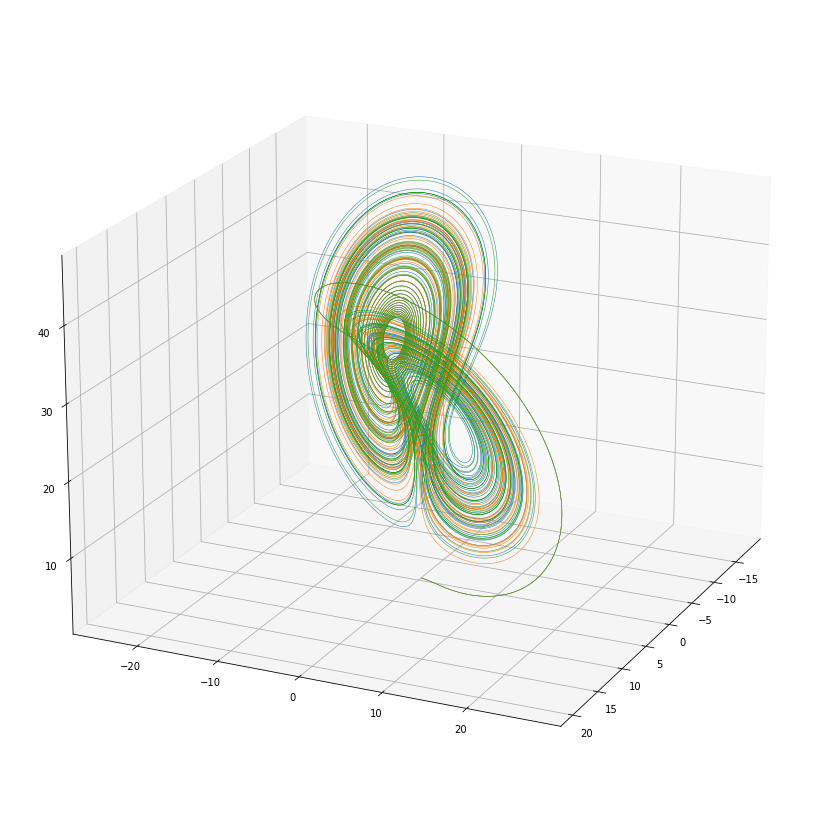

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random

plt.figure(figsize = (15,15))
ax = plt.axes(projection = "3d")

s        = eval(input("σ ="))
r        = eval(input("ρ ="))
b        = eval(input("β ="))

for i in range(3):
    x0,y0,z0 = eval(input("x0-{0}, y0-{0}, z0-{0} =".format(i)))
    
    dx       = lambda x,y,z: s*(y-x)
    dy       = lambda x,y,z: r*x-y-x*z
    dz       = lambda x,y,z: -b*z+x*y
    dt       = 0.0001
    T        = np.arange(0,50,dt)
    x        = [x0 for x in range(len(T))]
    y        = [y0 for y in range(len(T))]
    z        = [z0 for z in range(len(T))]
    
    for t in range(len(T)-1): #len(T)-1 so we stay in range
        x[t+1] = x[t] + dx(x[t], y[t], z[t]) * dt
        y[t+1] = y[t] + dy(x[t], y[t], z[t]) * dt
        z[t+1] = z[t] + dz(x[t], y[t], z[t]) * dt
    
    ax.plot3D(x,y,z,linewidth=0.5)

ax.view_init(20,25)
plt.show()

## Question 2: SIR with β = 1 and γ = 0.5

initial percent infectuous:  0.1


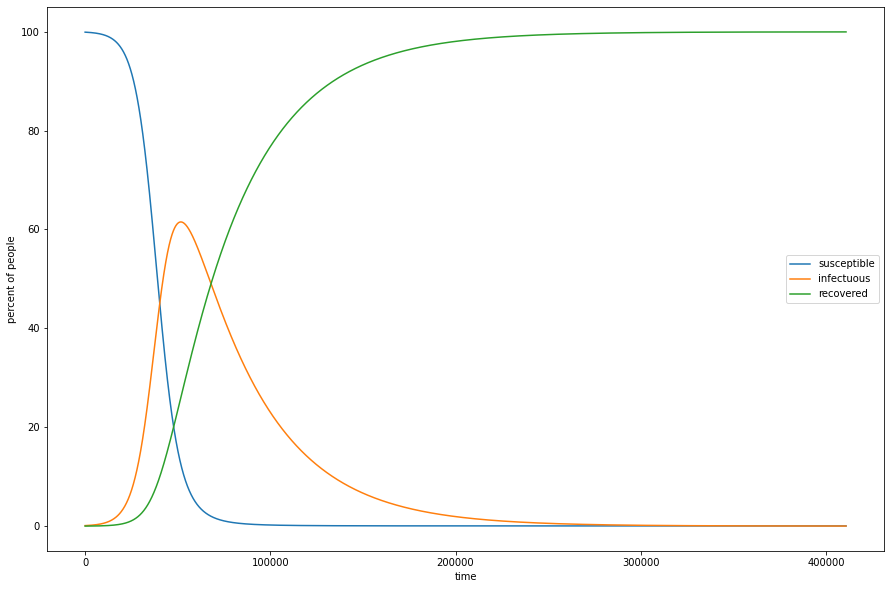

max percent infected:  61.51453473508214


In [7]:
import matplotlib.pyplot as plt
import numpy as np

b = 2
g = 0.25
dt = 0.0001

i0 = float(input('initial percent infectuous: '))/100
s0 = 1-i0

ds = lambda s,i: -b*s*i
di = lambda s,i: b*s*i - g*i
dr = lambda i:   g*i

s,i,r = [s0],[i0],[0]

while i[-1] >= (s0+i0)*0.0001:
    s.append(s[-1] + ds(s[-1],i[-1])*dt)
    i.append(i[-1] + di(s[-1],i[-1])*dt)
    r.append(r[-1] + dr(i[-1])*dt)
    
s = [100*x for x in s]
i = [100*x for x in i]
r = [100*x for x in r]

plt.figure(figsize = (15,10))
plt.plot(range(len(s)),s,label='susceptible')
plt.plot(range(len(i)),i,label='infectuous')
plt.plot(range(len(r)),r,label='recovered')
plt.xlabel('time')
plt.ylabel('percent of people')
plt.legend()
plt.show()

print("max percent infected: ", max(i))

The simulation isn't perfect, but for small (realistic) initial infection rates, the max percent of people infected is always about 61. In real life, it's usually a small handful of people who begin the disease transmission. If you're over 10 percent, that usually means the disease has already been wreaking havok for some time, and some people have already recovered.

## Question 3 - Curve Fitting an Sir Model

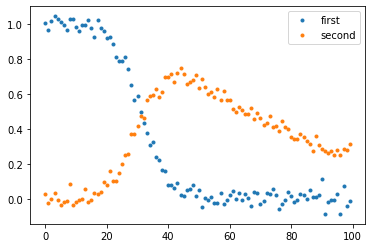

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

with open('HW9_2021_example.csv') as csvfile:
    data_SIR=[]
    readCSV = csv.reader(csvfile)
    for row in readCSV:
        data_SIR.append(row)

data_SIR = data_SIR[1:]
data_SIR = np.array(data_SIR,dtype = np.float32)

plt.plot(data_SIR[::,1],'.',label='first')
plt.plot(data_SIR[::,2],'.',label='second')
plt.legend()
plt.show()
# open the file, get the data, plot

t = [x for x in range(len(data_SIR))]

In [72]:
data_SIR = np.delete(data_SIR,0,axis=1)

In [73]:
params = Parameters()
params.add('i0', value=float(data_SIR[0][1]), min=0, max=1)
params.add('s0', value=float(data_SIR[0][0]), min=0, max=1)
params.add('b', value=1, min=0, max=2)
params.add('g', value=0.5, min=0, max=2)

def SIR_func(xs, t, params):
    try:
        b = params['b'].value
        g = params['g'].value
    except:
        b, g = params
    
    s, i = xs
    return [-b*s*i, b*s*i - g*i]

X0 = np.array([data_SIR[0][0], data_SIR[0][1]])

In [74]:
def SciPiSolve(t, X0, params):
    return odeint(SIR_func, X0, t, args=(params,))

In [75]:
def residual(params, t, data):
    init_conditions = params['s0'].value, params['i0'].value
    model = SciPiSolve(t, init_conditions, params)
    return (model - data).ravel()

In [76]:
result = minimize(residual, params, args=(t, data_SIR), method='leastsq')
final = data_SIR + result.residual.reshape(data_SIR.shape)

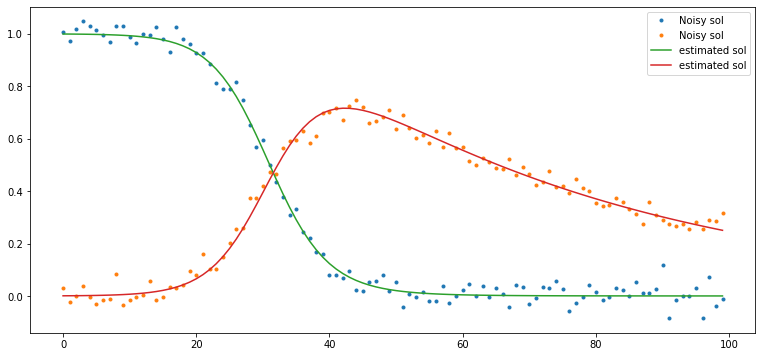

In [77]:
# final visualization
plt.figure(figsize=(13,6))

plt.plot(t, data_SIR,'.', label='Noisy sol')
plt.plot(t,final, label='estimated sol')

plt.legend()
plt.show()